## EXIF to DataFrame:

This notebook shows the process of converting a directory of image files into a dataframe and saving as a csv file.

In [1]:
import numpy as np
import pandas as pd
import random
import cv2
import os
from PIL import Image as Pil_Img
from PIL.ExifTags import TAGS
from IPython.display import Image

This code can also be run as a .py utility file by calling EXIF_2df(directory_path) with the following imports:


In [ ]:
import sys
sys.path.append('../code')
from exif_2_dataframe import EXIF_2df

#### Extract EXIF Data:

Extract EXIF data from image using Python Imaging Library.

In [2]:
def get_exif(fn):
    ret = {}
    i = Pil_Img.open(fn)
    info = i._getexif()
    for tag, value in info.items():
        decoded = TAGS.get(tag, tag)
        ret[decoded] = value
    return ret

#### Functional Test:

Randomly select an image from the directory and show exif data with image file to verify `get_exif` function operation.

./data/imagery/train/FILE0008_4.jpg
{'ResolutionUnit': 2, 'ExifOffset': 236, 'ImageDescription': 'FILE0008', 'Make': 'Leafriver', 'Model': 'IR-7', 'Software': 'EXIF Software Version 24DI9803', 'Orientation': 1, 'DateTime': '2013:08:29 16:17:07', 'YCbCrPositioning': 2, 'XResolution': (72, 1), 'YResolution': (72, 1), 'ExifVersion': b'0220', 'ComponentsConfiguration': b'\x01\x02\x03\x00', 'CompressedBitsPerPixel': (2, 1), 'DateTimeOriginal': '2013:08:29 16:17:05', 'DateTimeDigitized': '2013:08:29 16:17:05', 'ExposureBiasValue': (140, 10), 'MaxApertureValue': (3, 2), 'MeteringMode': 2, 'LightSource': 2, 'Flash': 0, 'FocalLength': (82, 11), 'UserComment': b'\x01\x00\x00}ZY\x03\xff\x00\x00\xaa\x00J\x00@\x00Q\x00@\xff\xbb\x14u\x14F\xff\xff\x00Z\x10\xcc\x00~\xff\x00Z\x01\x00\xff\x01\xdd\xff\xff\xff\xfc\x0eZ~}\xff\x00\x00<\x00\x00\x00\x01\x00\x00\x00\xf0\x1a)\x8c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

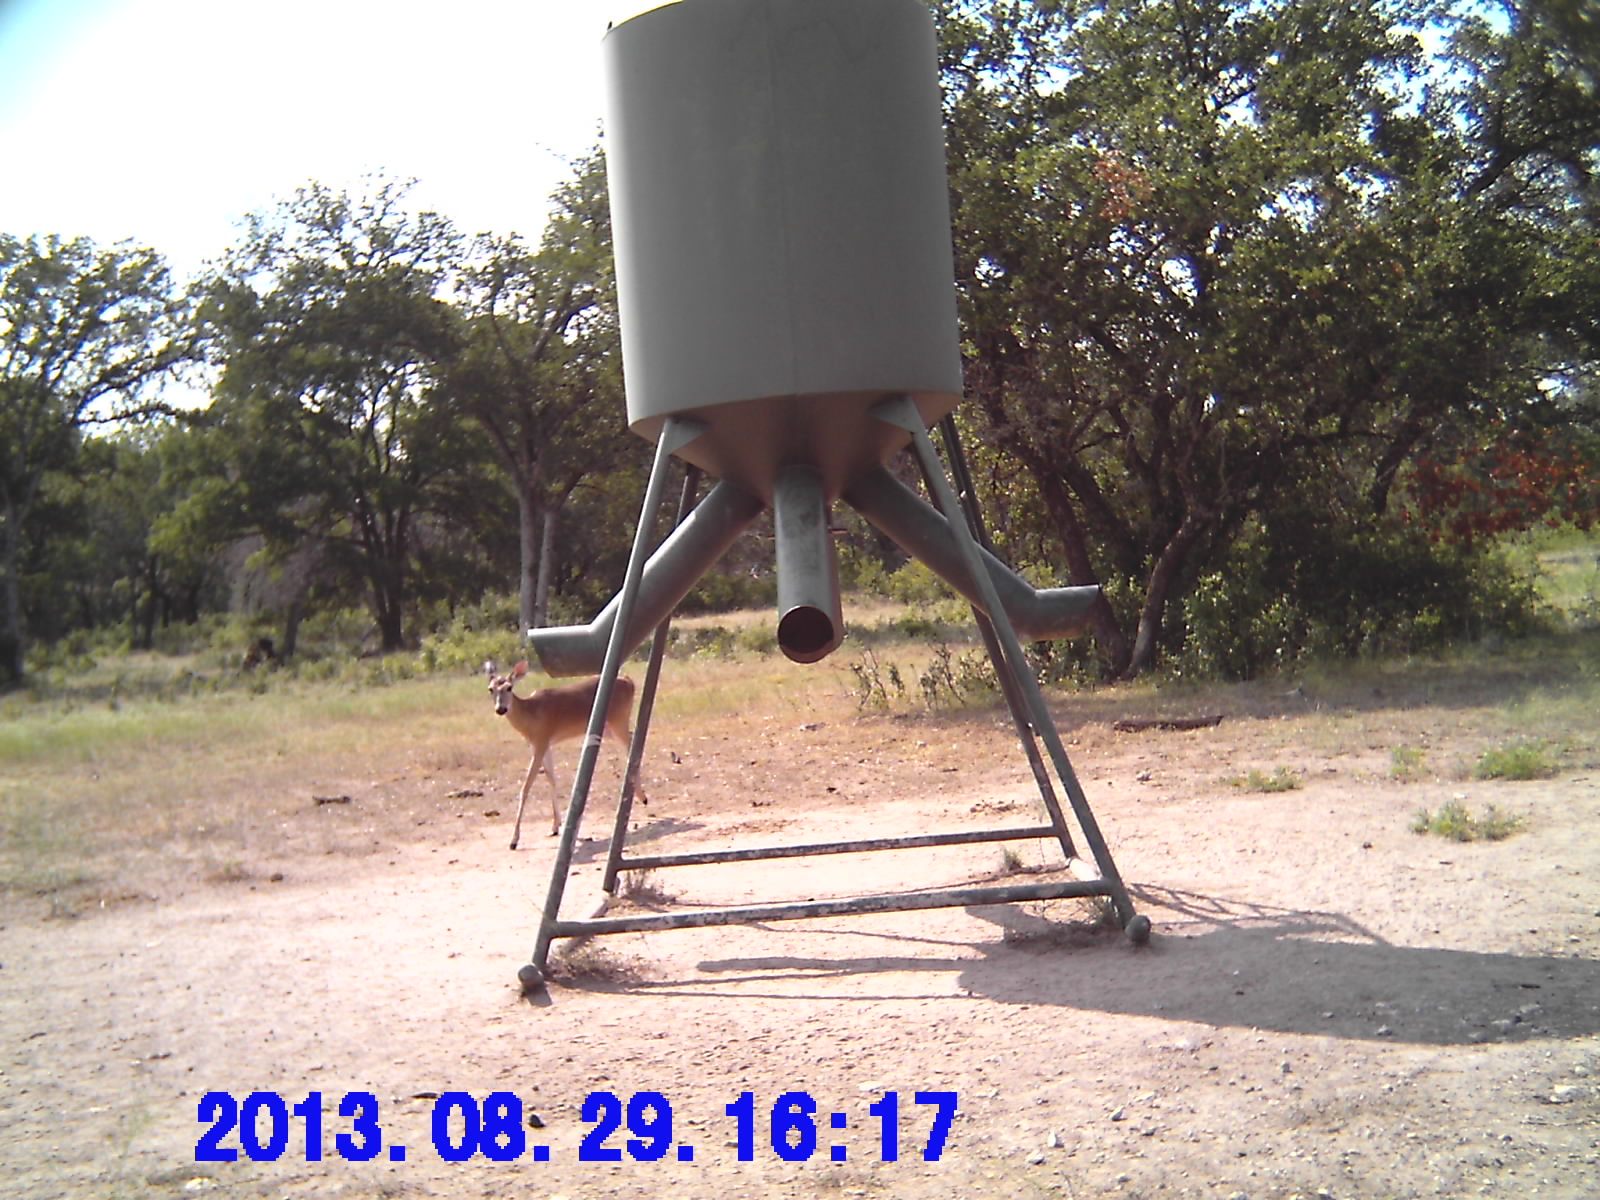

In [4]:
path = './data/imagery/train/'

ftest = random.sample(os.listdir(path), k = 1)
ftest = path + ftest[0]
print(ftest)
pic = get_exif(ftest)
print(pic)
Image(filename = ftest)

#### Create Dataframe from EXIF data:

* Convert exif data format to dictionary 
* Load dictionary to DataFrame and remove null values
* Export DataFrame to csv format for Tableau

In [5]:
exif_pics = dict()
path = './data/imagery/train/'
exif_list = ['Make', 'Model', 'DateTime', 'Flash', 'LightSource']
no_exif, dict_idx = 0, 0

for idx, photo in enumerate(os.listdir(path)):
    fname = path + photo
    try:
        pic = get_exif(fname)
        exif_pics[idx] = {k: pic[k] for k in exif_list if k in pic}
    except:
        no_exif += 1
        
df = pd.DataFrame(exif_pics)
df = df.T
df = df.reset_index(drop = True)
df = df.dropna(subset = ['DateTime'])
df.head(15)

,DateTime,Flash,LightSource,Make,Model
0,2013:07:28 14:02:47,0,2,Leafriver,IR-7
1,2013:07:28 11:53:33,0,2,Leafriver,IR-7
2,2013:08:29 16:06:00,0,2,Leafriver,IR-7
3,2013:08:26 07:51:35,0,2,Leafriver,IR-7
4,2013:08:29 16:04:37,0,2,Leafriver,IR-7
5,2013:08:29 16:41:16,0,2,Leafriver,IR-7
6,2013:08:29 16:40:43,0,2,Leafriver,IR-7
7,2013:08:29 16:17:07,0,2,Leafriver,IR-7


In [7]:
df.to_csv(path_or_buf = './data/df_exif.csv')